In [1]:
# Useful for debugging
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['figure.figsize'] = (13,8)
#%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# APEX Gun example

In [4]:
from gpt import GPT
from distgen import Generator
import os

GPT_IN = 'templates/apex_gun/gpt.in'
DISTGEN_IN = 'templates/apex_gun/distgen.yaml'

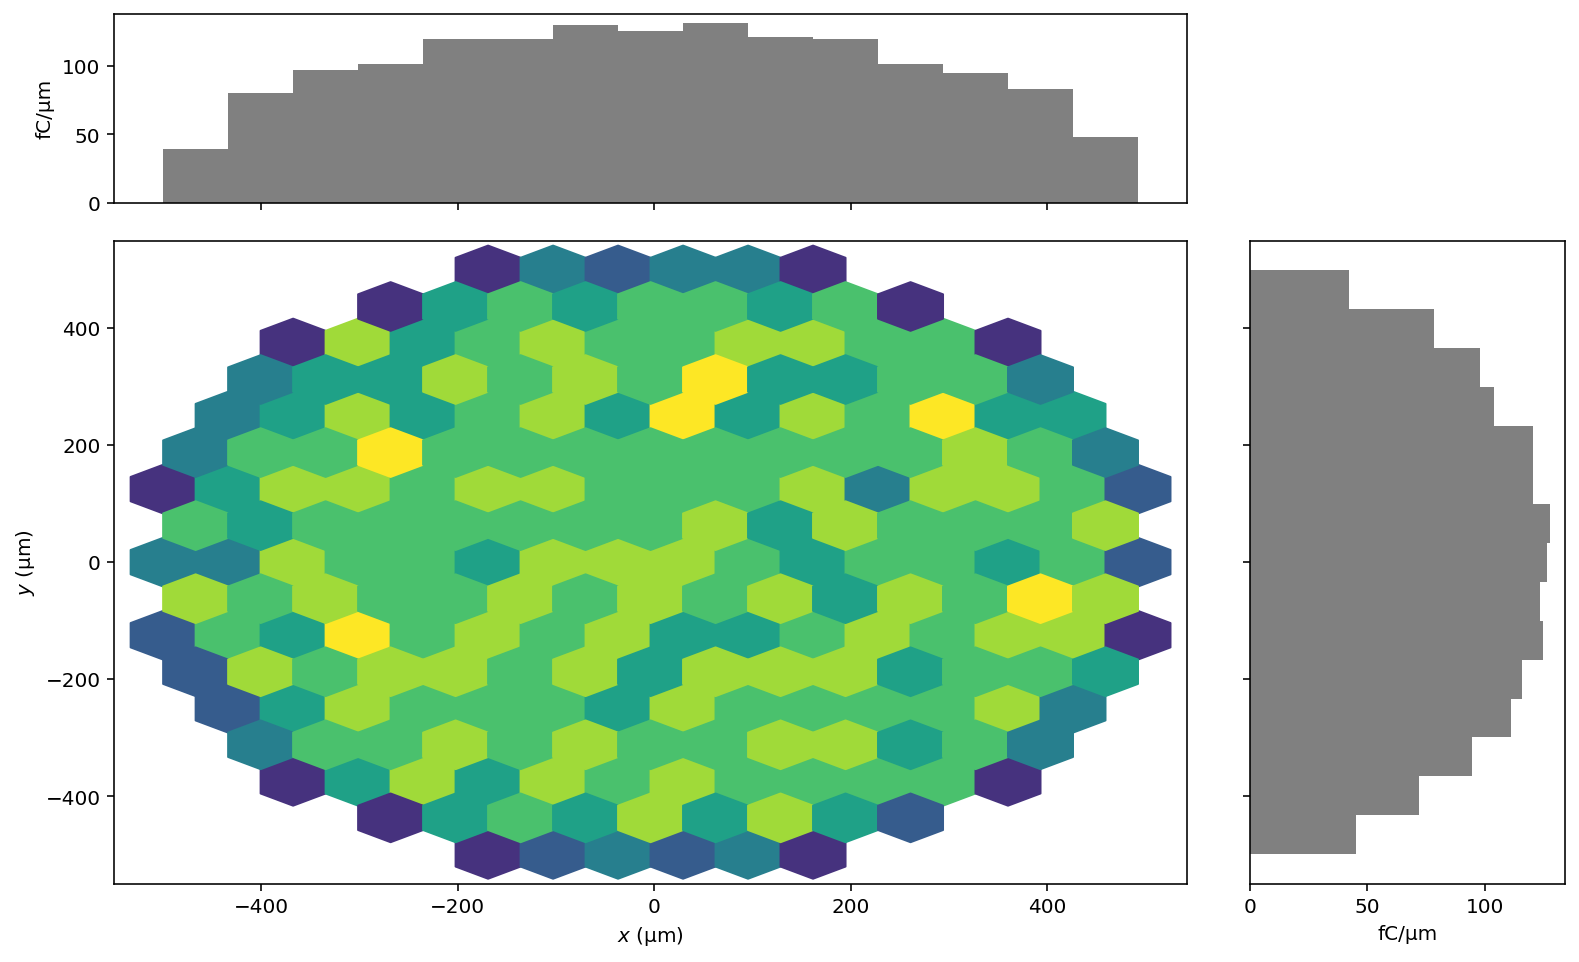

In [16]:
gen = Generator(DISTGEN_IN)
gen['n_particle'] = 1000

gen.run()
P0 = gen.particles
factor = 2
#P0.x *= factor  
#P0.y *= 1/factor 
P0.plot('x', 'y')

In [32]:
from gpt import run_gpt_with_distgen

settings = {'n_particle':100,
            'gun_peak_field':20e6,
            'gun_relative_phase':0,
            'BSOL':0.075,
            'tmax': 5e-9, 
            'RadiusMax':.015,
            'Ntout':2000,
            'dtmin':0,
            'GBacc':6.5,
            'xacc':6.5,
            'space_charge':1}



G = run_gpt_with_distgen(settings, 
                         gpt_input_file=GPT_IN,
                         distgen_input_file=DISTGEN_IN,
                         auto_phase=True,
                         verbose=True)



Run GPT with Distgen:
Replacing param n_particle with value 100
gun_peak_field is in gpt
gun_relative_phase is in gpt
BSOL is in gpt
tmax is in gpt
RadiusMax is in gpt
Ntout is in gpt
dtmin is in gpt
GBacc is in gpt
xacc is in gpt
space_charge is in gpt
Linking particle files, distgen output will point to -> "gpt_particles.gdf" in working directory.

Distgen >------

Distribution format: gpt
Output file: /var/folders/t8/f3n1sdnn1jg0wfbpqfm1hsh80000gn/T/tmprrbe8b74/gpt_particles.gdf

Creating beam distribution....
   Beam starting from: cathode
   Total charge: 100 pC.
   Number of macroparticles: 100.
   Assuming cylindrical symmetry...
   r distribution: radial uniform
      min_r = 0 mm, max_r = 0.5 mm
   theta distribution: uniform theta
      min_theta = 0 rad, max_theta = 6.28319 rad
   t distribution: Gaussian
      avg_t = 0 ps, sigma_t = 8.500 ps
      Left n_sigma_cutoff = 3, Right n_sigma_cutoff = -3
   px distribution: Gaussian
      avg_px = 0 eV/c, sigma_px = 357.421 eV/c


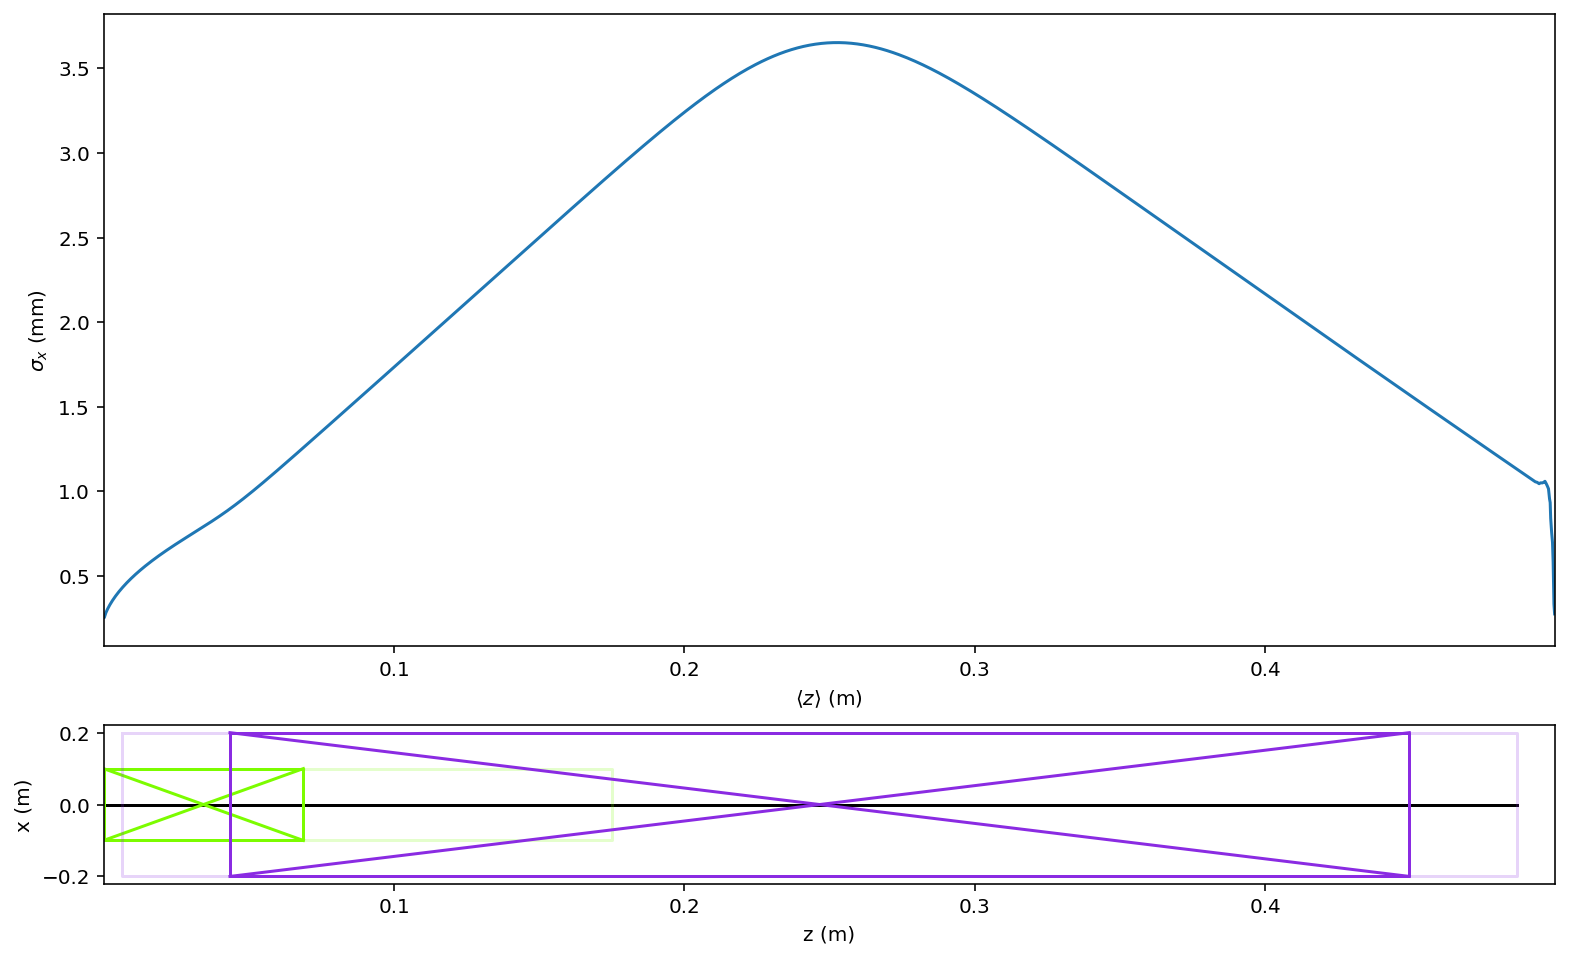

In [33]:
G.plot('sigma_x')

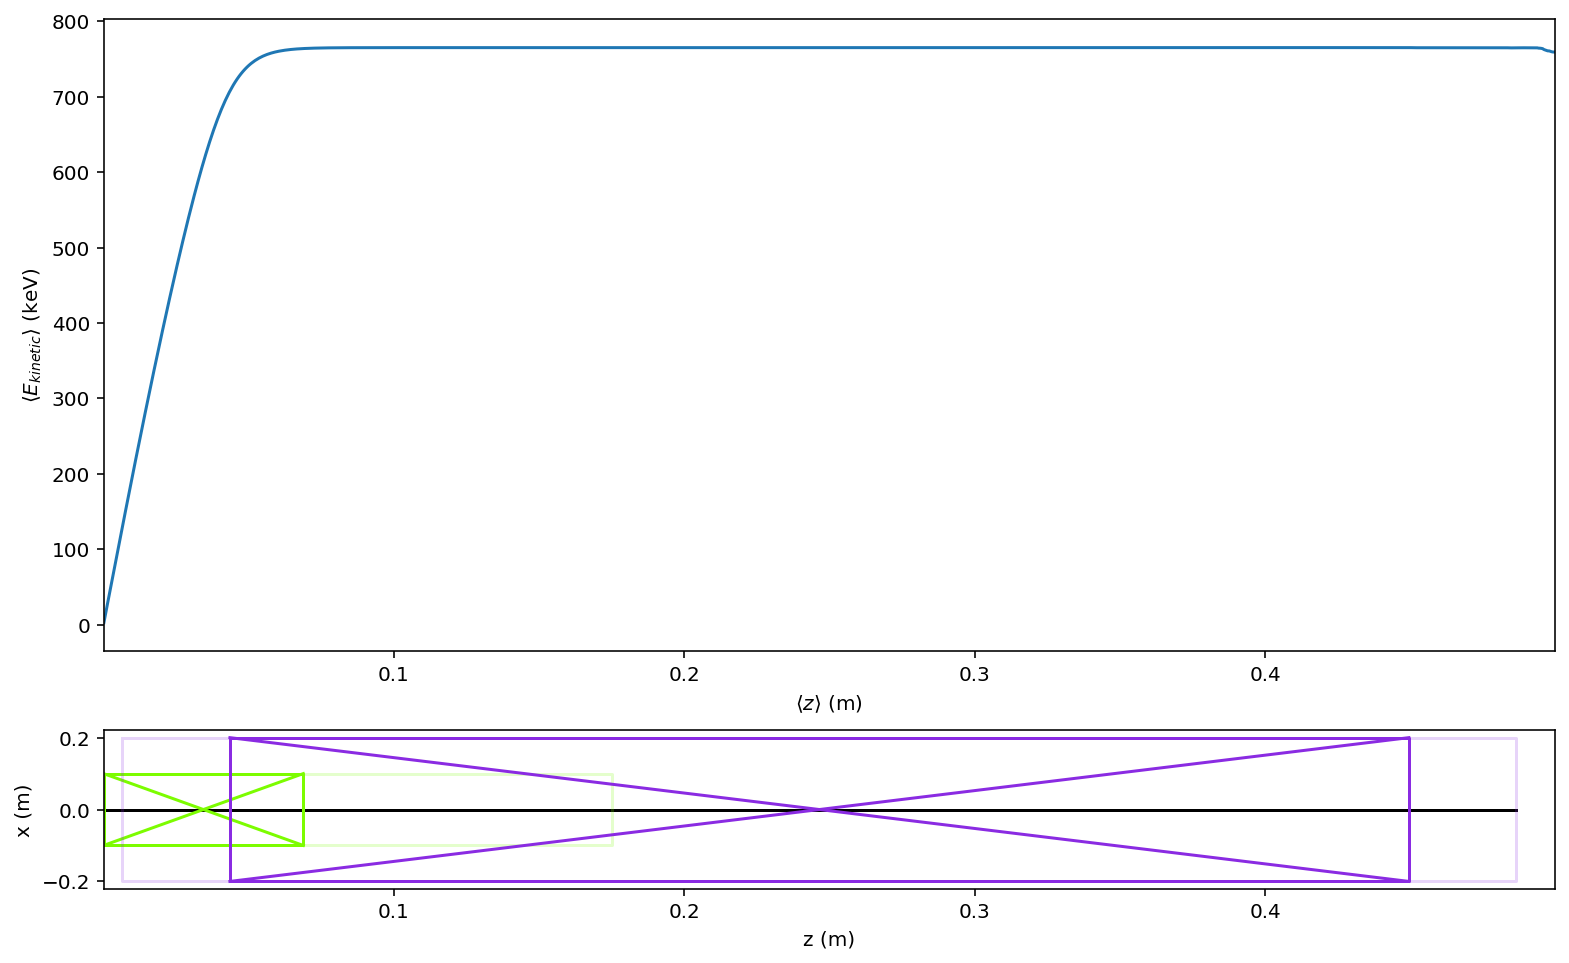

In [25]:
G.plot('mean_kinetic_energy')

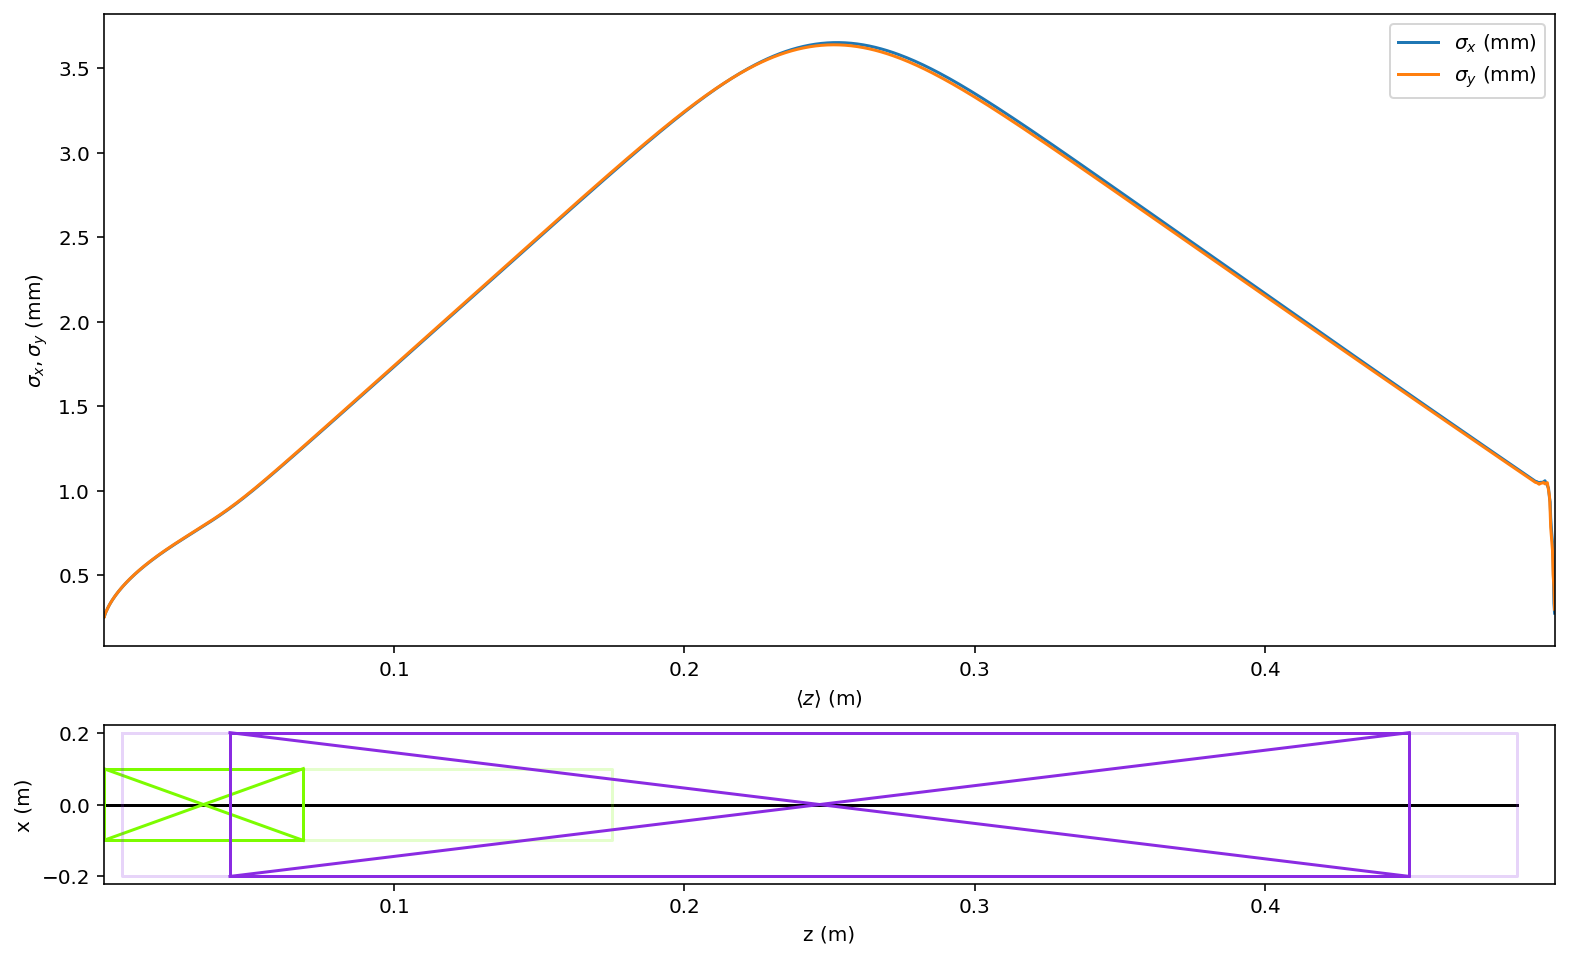

In [36]:
G.particles[-1]
G.plot()

# Plot trajectories

In [ ]:
G.particles[0]._settable_array_keys

In [34]:
import numpy as np
from matplotlib import pyplot as plt

# Make trajectory structure here for now, should go somewhere else as a function

rs ={}
for t in G.particles:
    for ID in t['id']:
        idint=int(ID)
        res = np.where(t['id']==ID)
        index = res[0][0]
        
        if(ID not in rs.keys()):
            rs[idint]={'x':[],'y':[],'z':[], 't':[], 'GBz':[]}
        else:
            rs[idint]['x'].append(t['x'][index])
            rs[idint]['y'].append(t['y'][index])
            rs[idint]['z'].append(t['z'][index])
            rs[idint]['t'].append(t['t'][index])
          #  rs[idint]['GBz'].append(t['GBz'][index])
         

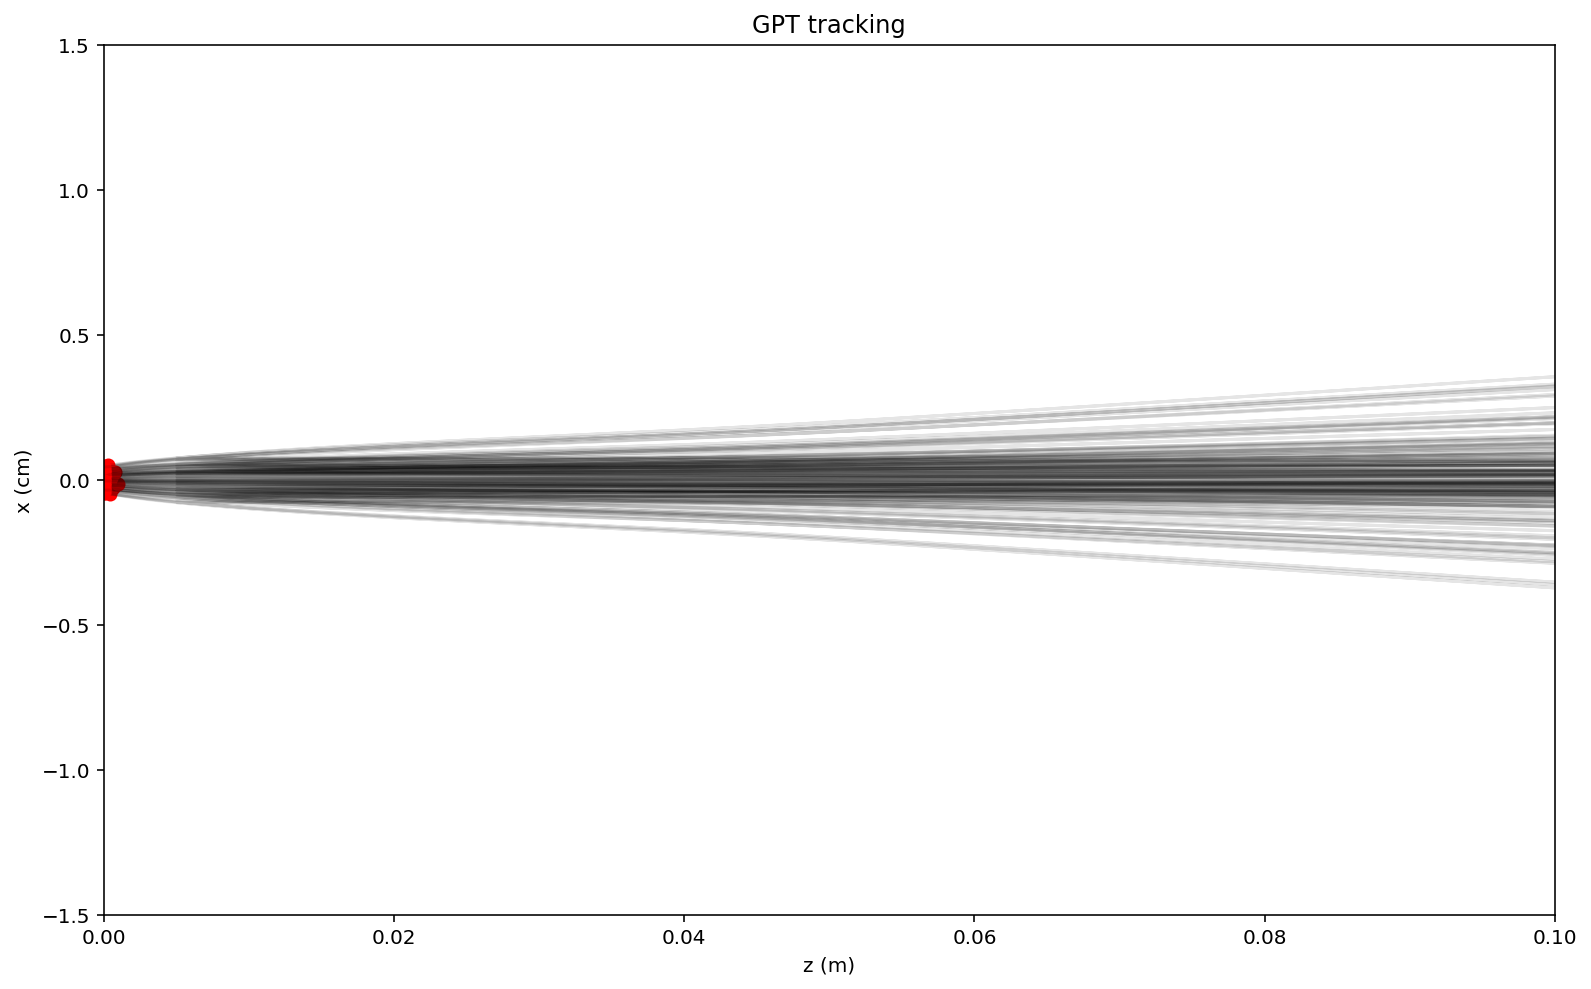

In [35]:
for ind in rs.keys():
    for var in rs[ind]:
        rs[ind][var]=np.array(rs[ind][var])

for ind in rs.keys():
    plt.plot(rs[ind]['z'][0],rs[ind]['x'][0]*1e2, color='red', marker='o')
    plt.plot(rs[ind]['z'],rs[ind]['x']*1e2, color='black', alpha=0.1)

plt.ylim(-1.5, 1.5)
plt.xlim(0, 0.1)
plt.title('GPT tracking')
plt.xlabel('z (m)');
plt.ylabel('x (cm)');

In [ ]:
zlist = np.array([P['mean_z'] for P in G.particles])


In [ ]:
np.argmin(abs(zlist - 0.15))

In [ ]:
G.particles[3]['mean_z']

In [ ]:
#G.particles[3].write('$HOME/Scratch/gpt_apex_100pC_4x.h5')

In [ ]:
G.archive('gpt_apex_gun.h5')

In [ ]:
G2 = GPT()
G2.load_archive('gpt_apex_gun.h5')

In [ ]:
G2.particles[3]['mean_z']

In [ ]:
G.tout

In [ ]:
plt.plot(np.array([P['n_particle'] for P in G.particles]))